In [7]:
import pylab as pl
import matplotlib.pyplot as plt

from astropy.table import Table

In [2]:
dat = Table.read('/global/cscratch1/sd/mjwilson/clauds/gaia.fits')

In [4]:
dat

ra,dec,ref_cat,ref_id,ref_epoch,mag,mask_mag,radius,radius_pix,pmra,pmdec,parallax,in_desi,istycho,isgaia,isbright,ismedium
float64,float64,bytes2,int64,float32,float32,float32,float32,int64,float32,float32,float32,bool,bool,bool,bool,bool
149.3620206943386,3.6364408187046178,G2,3848564544330803072,2015.5,12.89236,12.89236,0.006137197,85,-15.223774,13.359026,1.3921293,True,False,True,True,True
149.30089472241636,3.6261606790487333,G2,3848558810549887872,2015.5,15.353875,15.353875,0.0026998047,38,-25.030485,-1.4582331,1.2643068,True,False,True,False,True
149.6389404600455,3.7427178644592045,G2,3848578082067716864,2015.5,11.995036,11.995036,0.008279025,114,-15.446494,-9.472038,1.7758687,True,True,True,True,True
149.68466385644788,3.6473223368759027,G2,3848550151895843584,2015.5,12.451907,12.451907,0.0071086185,98,-9.955084,-93.88483,8.03084,True,False,True,True,True
149.54747439003162,3.720638815501717,G2,3848566232253403392,2015.5,13.171365,13.171365,0.005591731,77,-23.907732,3.877153,1.354347,True,False,True,False,True
149.47659935695657,3.6959515797423,G2,3848565923015761408,2015.5,13.481785,13.481785,0.00504163,70,8.651519,-7.0340176,2.074404,True,False,True,False,True
149.63682959128192,3.6557692439536704,G2,3848553141193083264,2015.5,13.5556135,13.5556135,0.004918971,68,-21.301012,4.4686675,1.8928407,True,False,True,False,True
149.6523275517245,3.654646179379064,G2,3848553072473606016,2015.5,13.952428,13.952428,0.004309051,60,-12.069066,8.022512,2.433068,True,False,True,False,True
149.66169717865753,3.735766426901321,G2,3848577845844967040,2015.5,14.203792,14.203792,0.00396244,55,-15.191075,-4.905696,0.932323,True,False,True,False,True


In [20]:
bright = dat[dat['mask_mag'] < 10]

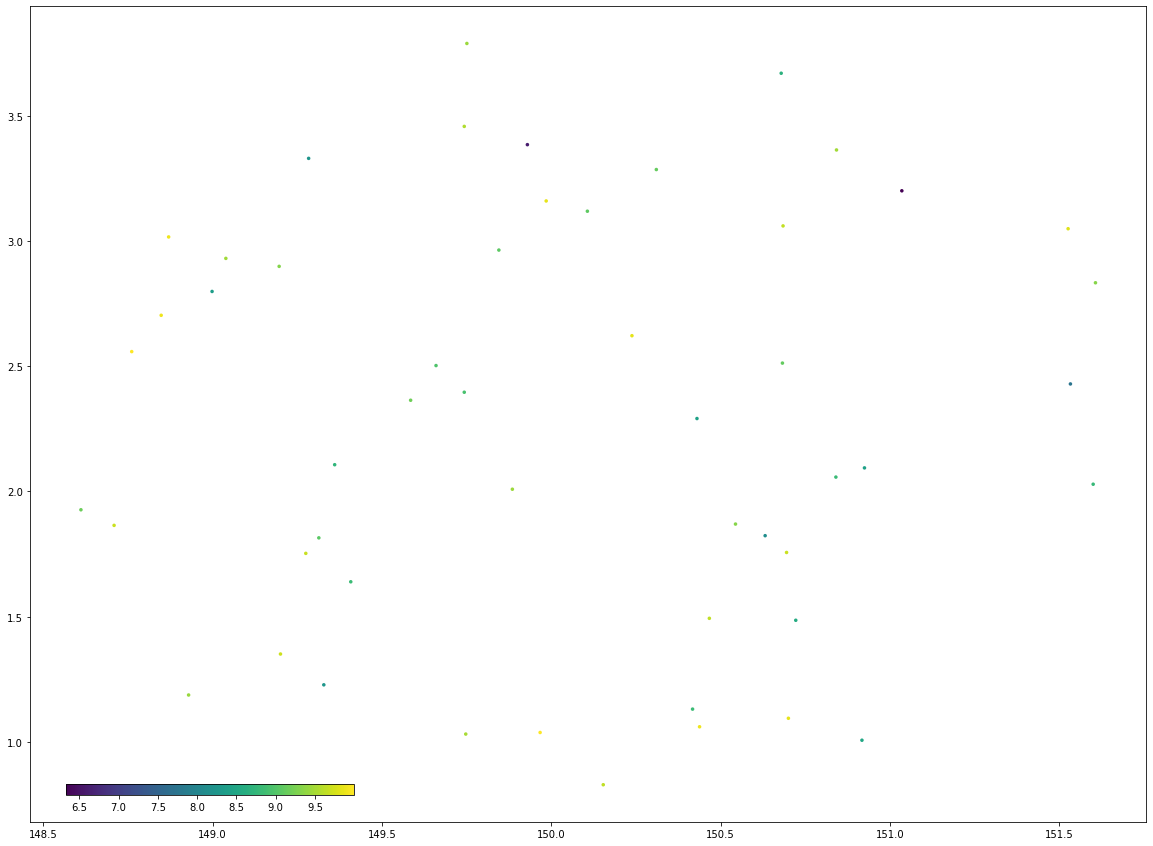

In [22]:
fig, ax  = plt.subplots(1, 1, figsize=(20, 15)) 

im       = pl.scatter(bright['ra'], bright['dec'], c=bright['mask_mag'], marker='.', s=50, lw=0.0)

cax      = fig.add_axes([0.15, 0.15, 0.2, 0.01])
fig.colorbar(im, cax=cax, orientation='horizontal')